## 에지 검출

### 캐니 에지 디텍터

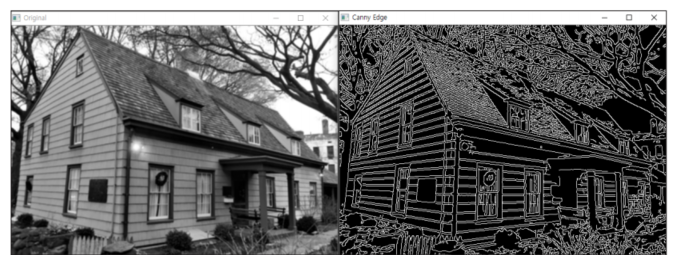

In [1]:
import cv2


img_gray = cv2.imread('./image/house.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow("Original", img_gray)

#블러를 적용하여 잡음 제거
img_gray = cv2.blur(img_gray,(3, 3))

#보통 첫 번째 임계값의 2~3배로 두번째 임계값을 정함
img_canny = cv2.Canny(img_gray, 50, 150)
cv2.imshow("Canny Edge", img_canny)

cv2.waitKey(0)
cv2.destroyAllWindows()

### 임계값 실시간 찾기

In [5]:
import cv2


#트랙바를 조정할 때마다 실행되는 콜백함수
# 여기에서는 아무 일하지 않는 더미함수로 정의 
def on_trackbar(x):
    pass


#트랙바를 붙일 윈도우를 생성
cv2.namedWindow('Canny')

#트랙바 생성
#(트랙바 이름, 윈도우 이름, 트랙바의 최소값, 트랙바의 최대값 콜백함수)
cv2.createTrackbar('low threshold', 'Canny', 0, 1000, on_trackbar)
cv2.createTrackbar('high threshold', 'Canny', 0, 1000, on_trackbar)


#트랙바의 초기값 설정
cv2.setTrackbarPos('low threshold', 'Canny', 50)
cv2.setTrackbarPos('high threshold', 'Canny', 150)



img_gray = cv2.imread('./image/house.png', cv2.IMREAD_GRAYSCALE)


while (True):

    #현재 트랙바의 위치를 가져오고
    low = cv2.getTrackbarPos('low threshold', 'Canny')
    high = cv2.getTrackbarPos('high threshold', 'Canny')


    #엣지 적용
    img_canny = cv2.Canny(img_gray, low, high)

    cv2.imshow('Canny', img_canny)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


cv2.destroyAllWindows()
